In [1]:
from fastai.vision.all import *
import gradio as gr
import wandb

In [23]:
Path.BASE_PATH = path = Path("/notebooks/tomatodiagnosis/data")

In [24]:
dls = ImageDataLoaders.from_folder(path, seed=42, item_tfms=Resize(224, method='crop'), valid_pct=0.2, 
                                   batch_tfms=aug_transforms(size=128, min_scale=0.75))

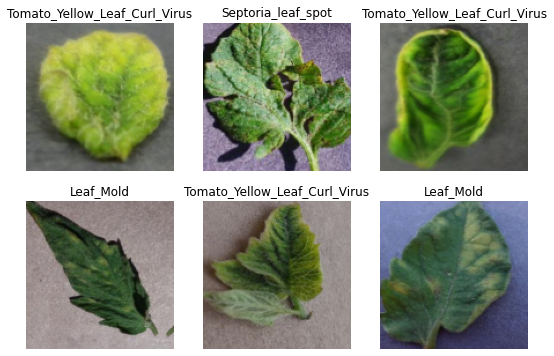

In [6]:
dls.show_batch(max_n=6)

In [25]:
x,_ = dls.one_batch()

In [27]:
x.shape

torch.Size([64, 3, 128, 128])

In [33]:
learn = load_learner('/notebooks/tomatodiagnosis/lab/notebooks/tomato.pkl')

In [29]:
learn.model.cuda()
learn.model.eval();

In [30]:
@patch
def requires_grad_(self:TensorBase, requires_grad=True):
    self.requires_grad = requires_grad
    return self

In [34]:
torch.jit.save(torch.jit.script(learn.model), '02_model.pt')

RuntimeError: Can't redefine method: forward on class: __torch__.fastai.vision.learner.TimmBody (of Python compilation unit at: 0x45f4b70)

In [11]:
torch.jit.save(torch.jit.trace(learn.model, x), 'model.pt')

## Trying to Predict

In [2]:
img = '/notebooks/tomatodiagnosis/lab/tomato/septoria-leaf-spot2.jpg'
img = PILImage.create(img)
img.size

(1536, 1033)

In [3]:
model_path = "/notebooks/tomatodiagnosis/lab/notebooks/model.pt"

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(model_path, map_location=device)

In [13]:
resized_image = img.resize((224,224))

In [18]:
normalized_img = tensor(img).float()/255

In [22]:
model.code

'def forward(self,\n    input: Tensor) -> Tensor:\n  _1 = getattr(self, "1")\n  _0 = getattr(self, "0")\n  return (_1).forward((_0).forward(input, ), )\n'

In [10]:
input_data = torch.tensor(preprocessed_img, dtype=torch.float32)

fastai.vision.core.PILImage

In [13]:
import gradio as gr
labels = model.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = model.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

AttributeError: 'RecursiveScriptModule' object has no attribute 'dls'